In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

import keras
from tensorflow.keras.utils import img_to_array, load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg19 import VGG19, preprocess_input , decode_predictions

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!ls "/content/drive/MyDrive"


 Classroom
'Colab Notebooks'
 contacts.gsheet
'Copy of API & REST.gdoc'
'Copy of End-to-end Logging.gdoc'
'Copy of HMacSHA256.gdoc'
'Copy of Microservices Architecture - System Design.docx'
 day3.1
 day3.1.zip
'DOC-20240318-WA0042. (1) (1).gdoc'
'DOC-20240318-WA0042. (1).gdoc'
 ecommerce.drawio
 Features.gsheet
 IM.JPG
'MCA Final Thesis Gaurav Aman (1) (2)-2.gdoc'
'MCA Final Thesis Gaurav Aman (1).gdoc'
'MCA Final Thesis Gaurav Aman (2) (1) (1).gdoc'
'MCA Final Thesis Gaurav Aman.gdoc'
'MCA Thesis Front Page 2022-23 (1).gdoc'
'MCA Thesis Front Page 2022-23 (2).gdoc'
'MCA Thesis Front Page 2022-23 (3).gdoc'
'MCA Thesis Front Page 2022-23.gdoc'
'pdf_merge (2).pdf'
 pdf_merged.gdoc
'Resume_Shaziya (1).pdf'
'Resume_Shaziya (2).pdf'
'Resume_Shaziya (3).pdf'
 Resume_Shaziya.pdf
'Screenshot 2025-04-12 234632.png'
'Screenshot 2025-04-19 230356.png'
'Screenshot 2025-04-27 000849.pdf'
'SKIN DISEASES'
'Untitled document (1).gdoc'
'Untitled document (2).gdoc'
'Untitled document (3).gdoc'
'Untitled

In [4]:
train_datagen = ImageDataGenerator(rescale=1/255,zoom_range= 0.5, shear_range= 0.3, horizontal_flip= True)
val_datagen = ImageDataGenerator(rescale=1/255)

In [5]:
train = train_datagen.flow_from_directory(directory= "/content/drive/MyDrive/SKIN DISEASES/Train" ,target_size= (224,224), batch_size=32)
val = val_datagen.flow_from_directory(directory= "/content/drive/MyDrive/SKIN DISEASES/Valid" ,target_size= (224,224), batch_size=32)

Found 5747 images belonging to 6 classes.
Found 1443 images belonging to 6 classes.


In [6]:
t_img , label = next(train)

t_img.shape

In [7]:
def plotImage(img_arr, lable):

  for im , l in zip(img_arr , lable):
    plt.figure(figsize=(5,5))
    plt.imshow(im)
    plt.show()

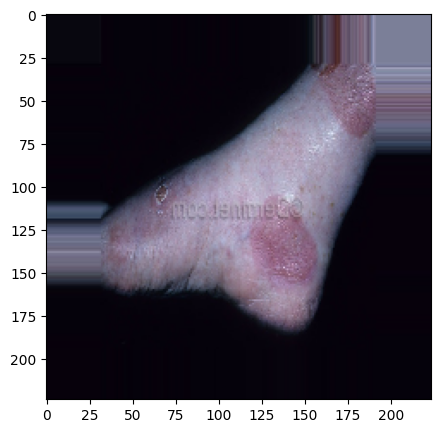

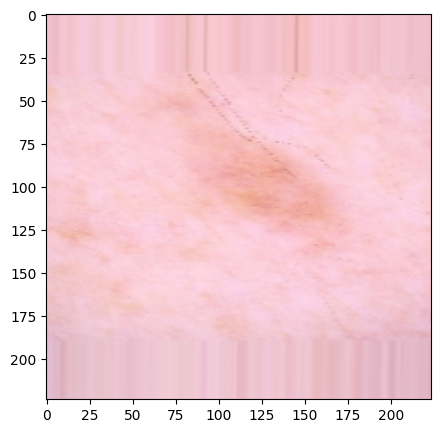

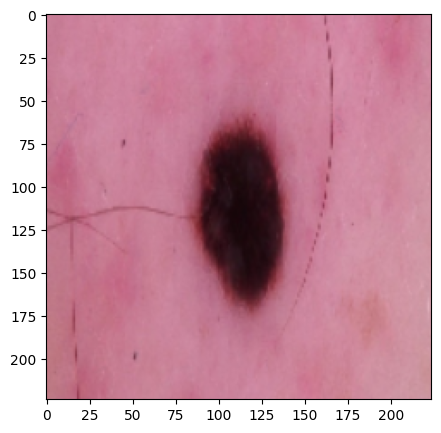

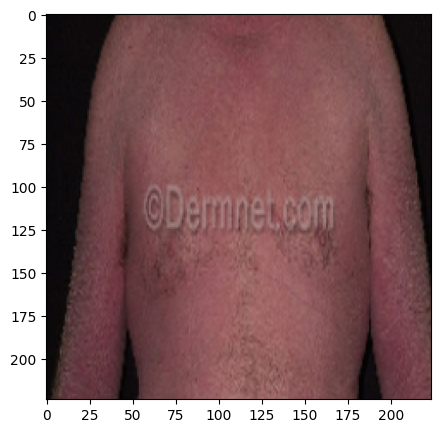

In [8]:
plotImage(t_img[:4], label[:4])

#building our model


In [9]:
from keras.layers import Dense, Flatten
from keras.models import Model
from keras.applications import MobileNet
import keras

In [10]:
base_model = MobileNet(
    #Load weights into the pre-trained MobileNet model
    weights="imagenet",
    input_shape=(224, 224, 3),
    #Exclude the ImageNet classifier at the top of the model
    include_top=False
)

17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [11]:

# base_model = VGG19(input_shape=(224,224,3), include_top= False)

In [12]:
for label in base_model.layers:
  label.trainable = False

In [13]:
# base_model.summary()

In [14]:

X = Flatten()(base_model.output)
X = Dense(units=6, activation='softmax')(X)
#creating our model
model = Model(base_model.input, X)

In [15]:
# model.summary()

In [16]:
model.compile(optimizer = 'adam', loss= keras.losses.categorical_crossentropy, metrics = ['accuracy'])

In [17]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

es = EarlyStopping(
    monitor='val_accuracy',
    min_delta=0.01,
    patience=3,
    verbose=1
)

mc = ModelCheckpoint(
    filepath="best_model.h5",
    monitor='val_accuracy',
    save_best_only=True,
    verbose=1
)


In [18]:
train.class_indices.values()

dict_values([0, 1, 2, 3, 4, 5])

In [19]:
train.class_indices.keys()

dict_keys(['Bullous', 'Eczema', 'Melanoma', 'Nail Fungus', 'Normal skin', 'Vascular Tumors'])

In [20]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [ ]:

history = model.fit(train,
                          steps_per_epoch= 32,
                          epochs= 16,
                          verbose= 1,
                          callbacks= cb,
                          validation_data= val,
                          validation_steps= 16)


Epoch 1/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11s/step - accuracy: 0.3152 - loss: 6.4069

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()



Epoch 1: val_accuracy improved from -inf to 0.67188, saving model to best_model.h5


5/5 ━━━━━━━━━━━━━━━━━━━━ 125s 24s/step - accuracy: 0.3387 - loss: 6.6110 - val_accuracy: 0.6719 - val_loss: 6.2405
Epoch 2/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9s/step - accuracy: 0.5817 - loss: 8.5579
Epoch 2: val_accuracy improved from 0.67188 to 0.71875, saving model to best_model.h5


5/5 ━━━━━━━━━━━━━━━━━━━━ 60s 15s/step - accuracy: 0.5858 - loss: 8.1779 - val_accuracy: 0.7188 - val_loss: 5.6961
Epoch 3/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12s/step - accuracy: 0.6575 - loss: 6.6538 
Epoch 3: val_accuracy did not improve from 0.71875
5/5 ━━━━━━━━━━━━━━━━━━━━ 67s 17s/step - accuracy: 0.6687 - loss: 6.3834 - val_accuracy: 0.6719 - val_loss: 5.3308


In [24]:
h = history.history
h.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

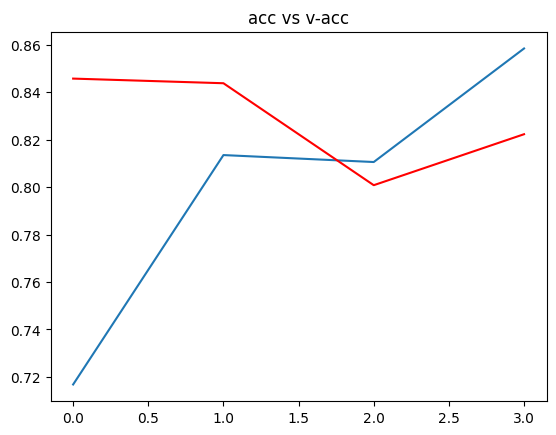

In [ ]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'] , c = "red")
plt.title("acc vs v-acc")
plt.show()

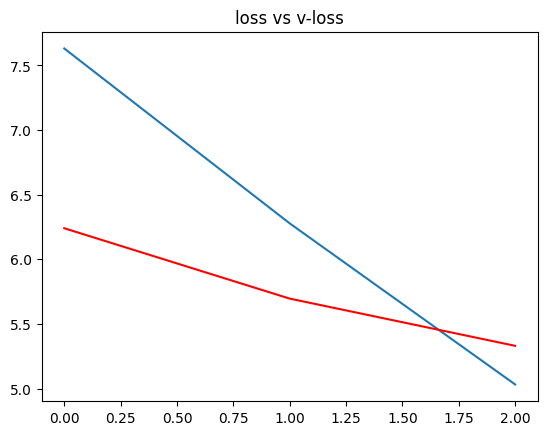

In [25]:
plt.plot(h['loss'])
plt.plot(h['val_loss'] , c = "red")
plt.title("loss vs v-loss")
plt.show()

In [26]:

#load best model
from keras.models import load_model
model = load_model("/content/best_model.h5")

In [27]:
ref = dict(zip(list(train.class_indices.values()) , list(train.class_indices.keys())))

In [28]:
print(ref)

{0: 'Bullous', 1: 'Eczema', 2: 'Melanoma', 3: 'Nail Fungus', 4: 'Normal skin', 5: 'Vascular Tumors'}


In [29]:
list(train.class_indices.values())

[0, 1, 2, 3, 4, 5]

In [30]:
def prediction(path):
  img = load_img(path, target_size= (224,224))
  i = img_to_array(img)
  im = preprocess_input(i)
  img = np.expand_dims(im , axis= 0)
  pred = np.argmax(model.predict(img))

  print(f"the image belongs to {ref[pred] }")

In [34]:
path = "/content/drive/MyDrive/SKIN DISEASES/Test/Eczema/eczema 15.jpg"

prediction(path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
the image belongs to Nail Fungus


In [35]:
!pwd

/content


In [36]:
!pip install tensorflowjs


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 5.9 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 25.0
    Uninstalling packaging-25.0:
      Successfully uninstalled packaging-25.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
db-dtypes 1.4.4 requires packaging>=24.2.0, but you have packaging 23.2 which is incompatible.
google-cloud-bigquery 3.38.0 requires packaging>=24.2.0, but you have packaging 23.2 which is incompatible.
xarray 2025.11.0 requires packaging>=24.1, but you have packaging 23.2 which is incompatible.


In [ ]:
!mkdir tensorflowjs-model

In [ ]:
!tensorflowjs_converter --input_format keras '/content/best_model.h5' 'tensorflowjs-model/'

In [ ]:
!zip -r tensorflowjs-model.zip tensorflowjs-model